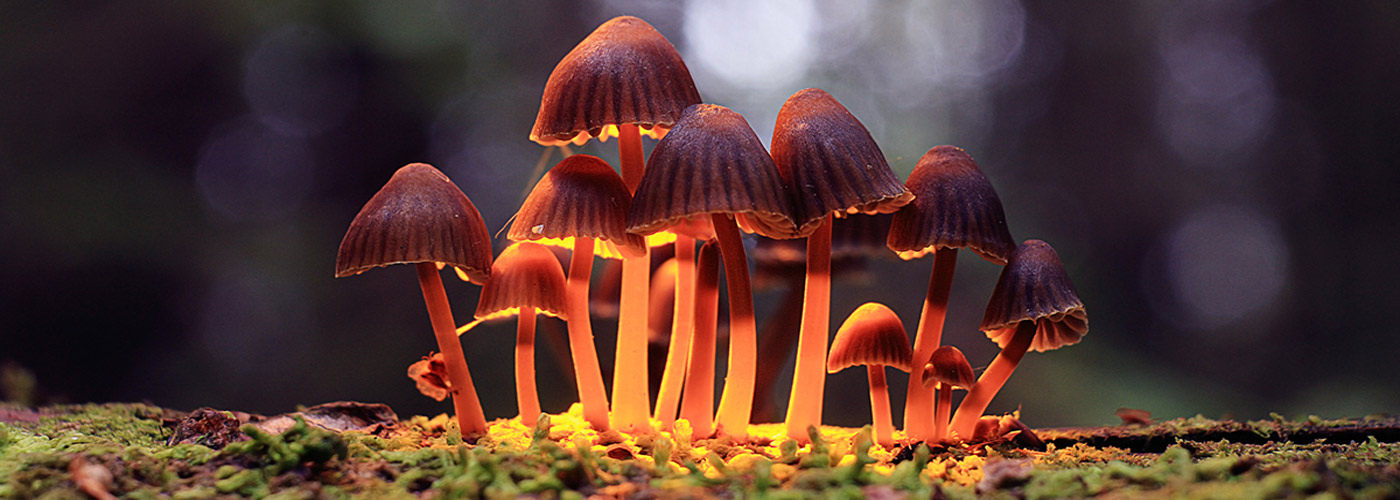

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [ ]:
#Look at the Data Head
df.head()

In [ ]:
#Data frame information
df.info()

In [ ]:
#Checking if have some null values for Clean the data
df.isnull().sum()

In [ ]:
#Checking how many rows and columns we have.
df.shape

### Explanation of the relevant features

Attribute Information: (classes: edible = e, poisonous = p)

* cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
* cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
* cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
* bruises: yes = t, no = f
* odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
* gill-attachment: attached = a, descending = d, free = f, notched = n
* gill-spacing: close = c, crowded = w, distant = d
* gill-size: broad = b, narrow = n
* gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
* stalk-shape: enlarging = e, tapering = t
* stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
* stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* veil-type: partial = p, universal = u
* veil-color: brown = n, orange = o, white = w, yellow = y
* ring-number: none = n, one = o, two = t
* ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
* spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
* population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
* habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

In [ ]:
#how many Edible, Poisonous we have in the data set.
df['class'].value_counts()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize = (6,6))
#explsion
plt.pie(df['class'].value_counts(), colors = ['#6A9838','#af1222'], labels = ['Edible', 'Poisonous'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05), shadow = True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [ ]:
#The correlation between cap color and Edible or Poisonous
sns.catplot(x="cap-color", hue="class", col="class",data=df, kind="count",height=4, aspect=.8,palette =['#af1222','#6A9838']);

In [ ]:
#preprocessing - changing the values to numbers with label encoder.
def Label_enc(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

In [ ]:
for col in df.columns:
    df[str(col)] = Label_enc(df[str(col)])

In [ ]:
#Look at the Data Head affter label encoder
df.head()

In [ ]:
#Take a View of all features to gain insights
df.hist(bins=5, figsize=(15,15));

In [ ]:
#Easy to see that veil-type is useless because there are no data we needs.
del df['veil-type']

In [ ]:
#Split the data to y and x with x is without the class's.
y = df['class']
X = df.drop('class', axis=1)

In [ ]:
#Look at the Data Head affter deleting the veil-type and drop the class's.
X.head()

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
#Look at the Data Head affter StandardScaler.
X.head()

In [ ]:
#Heatmap of all features.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1,cmap="inferno", annot=True);

In [ ]:
#split data and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

#Data training set
print('Train data: ', len(X_train)/len(X))

#Data testing set
print('Test data: ', X_test.shape[0]/y.shape[0])


In [ ]:
#print how much rows and colums we have in test and train sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
#knn classifier with for loop [1-20] to check the best accuracy of n
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test,y_test)))

In [ ]:
#plot_confusion_matrix of knn 
plot_confusion_matrix(knn, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix KNN')
plt.show()

In [ ]:
#Print Confusion matrix Accuracy of knn
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_pred)))

In [ ]:
#roc_curve plot to check the socre of knn
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [ ]:
#classification_report of KNN
KNN_REPORT = classification_report(y_test, knn.predict(X_test))
print(KNN_REPORT)

In [ ]:
#Cross Val Score of Knn (showing 20)
cvs = cross_val_score(knn, X, y, cv=20)
cvs

In [ ]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_test,y_test)))

In [ ]:
#plot_confusion_matrix of RFC 
plot_confusion_matrix(RFC, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = "Accent", normalize= None)
plt.title('Confusion Matrix RFC')
plt.show()

In [ ]:
#Print Confusion matrix Accuracy of RFC
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_predict)))

In [ ]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_predict)
auc_score = roc_auc_score(y_test, y_predict)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [ ]:
#classification_report of RFC
RFC_REPORT = classification_report(y_test, y_predict)
print(RFC_REPORT)

In [ ]:
#Cross Val Score of RFC (showing 20)
cvs = cross_val_score(RFC, X, y, cv=20)
cvs

## Results:

* We can see that RandomForestClassifier gives us the best result for this data set Accuracy of 1.0 !
* KNeighborsClassifier $n \in \mathbb{N}^+$, such that $11<n$ we can see decreasing of the Accuracy.

You can be relex and enjoy of eating your mushrooms (after test with RandomForestClassifier of course)
